# Libraries

In [1]:
# x = season, y = PPG for that season

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Creating Variables and Graph

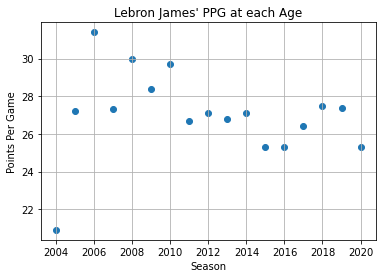

In [2]:
x = np.arange(2004, 2021, 1)
y = np.array([20.9, 27.2, 31.4, 27.3, 30.0, 28.4, 29.7, 26.7, 27.1, 26.8, 27.1, 25.3, 25.3, 26.4, 27.5, 27.4, 25.3])

plt.scatter(x, y)

plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.title("Lebron James' PPG at each Age")
plt.grid()
plt.show()

# Reshaping & Splitting Data

In [3]:
# Reshaping & Splitting Data 

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print('x:', x, '\n\n', 'y:', y)

x: [[2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]] 

 y: [[20.9]
 [27.2]
 [31.4]
 [27.3]
 [30. ]
 [28.4]
 [29.7]
 [26.7]
 [27.1]
 [26.8]
 [27.1]
 [25.3]
 [25.3]
 [26.4]
 [27.5]
 [27.4]
 [25.3]]


In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.23529411765, random_state=0) # Test size is 4/17 seasons

## Setting up Linear Regression Model

In [7]:
regressor = LinearRegression()

regressor.fit(train_x, train_y)

#For retrieving the slope:
print(regressor.coef_)
#His predicted PPG (with outliers, decreases at around .04 PPG per season)

[[-0.04310739]]


# Predicting Future Values

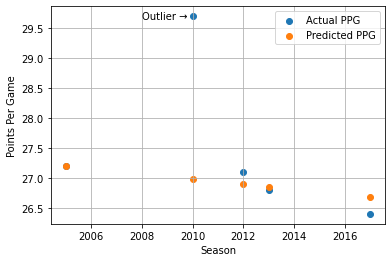

In [8]:
y_pred = regressor.predict(test_x)

# In[156]:


df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df


# In[157]:

plt.scatter(test_x, test_y, label = 'Actual PPG')
plt.scatter(test_x, y_pred, label = 'Predicted PPG')
plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.grid()
plt.legend()
plt.text(2008, 29.65, "Outlier →")
plt.show()

# Regression Line

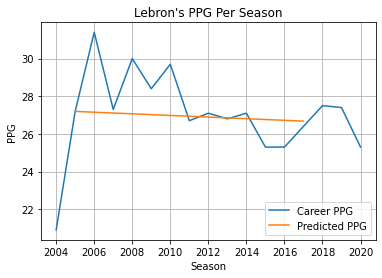

[[2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]] 

[[20.9       ]
 [27.2       ]
 [31.4       ]
 [27.3       ]
 [30.        ]
 [28.4       ]
 [29.7       ]
 [26.7       ]
 [27.1       ]
 [26.8       ]
 [27.1       ]
 [25.3       ]
 [25.3       ]
 [26.4       ]
 [27.5       ]
 [27.4       ]
 [25.3       ]
 [26.50614369]]


In [9]:
# I tried using 3/17 and 5/17 of the columns for test (you usually want to stay between 20-30%) but that led to higher errors


# # Prediction

# Predicting 2020-2021 PPG (Assuming MPG, FG%, etc stay relatively the same)

plt.plot(x, y, label = "Career PPG")
plt.plot(test_x, y_pred, label = "Predicted PPG")
plt.xlabel('Season')
plt.ylabel('PPG')
plt.title("Lebron's PPG Per Season")
plt.grid()
plt.legend(loc = "lower right")
plt.show()

xnew = np.array([2021])
xnew = xnew.reshape(-1, 1)

x.reshape(-1, 1)

x_new = np.concatenate((x, xnew))

ynew = regressor.predict(xnew)

y_new = np.concatenate((y, ynew))

print(x_new, "\n")
print(y_new)

# Predicting PPG for 2020-2021

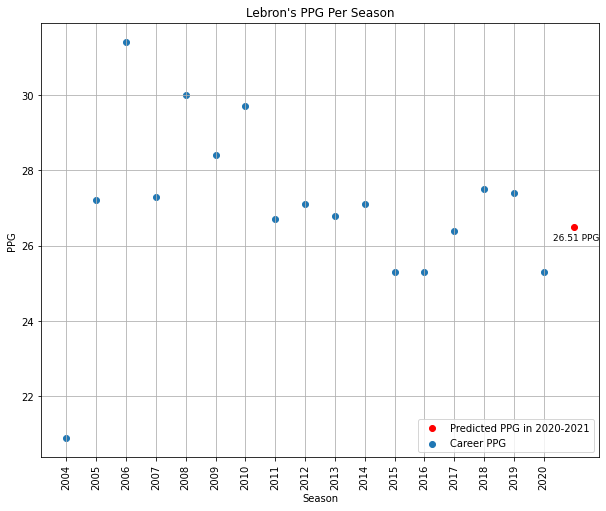

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label = "Career PPG")
plt.plot(x_new[-1], y_new[-1], "ro", label = "Predicted PPG in 2020-2021")
#plt.plot(x_new, y_new, label = "Predicted PPG in 2020-2021")
plt.xlabel('Season')
plt.ylabel('PPG')
plt.title("Lebron's PPG Per Season")
plt.grid()
plt.legend(loc = "lower right")
plt.xticks(x, rotation = 90)
plt.text(2020.3, 26.15, str(np.round(y_new[-1], 2)).strip("[]") + " PPG", fontdict = {"size" : "9"})
plt.show()